**Topic**: Analysing the largest revenue generators in the United States.

For the analysis, first, we import the required files.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from bs4 import BeautifulSoup
import requests

Reading the contents of the webpage to be scraped using BeautifulSoup.

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
print (soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vect

Scraping a table from the above the given url using find_all() function. Since the webpage has more than one table so the position of the table to be scraped is also reuired to be mentioned. The headrers in the table are also displayed verifying the table we need.

In [ ]:
table = soup.find_all('table')[1]
headers = table.find_all('th')
headers

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

Now, we are extracting the titles for the table.

In [ ]:
table_titles = [title.text.strip() for title in headers]
print(table_titles)


['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


Using pandas, a DataFrame has been created where we will feed the table in terms of rows and columns where columns heading would be the same as the titles extacted above.

In [ ]:
df = pd.DataFrame(columns = table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


Scraping the individual row of the table in order to scrape the column data to be appended in the DataFrame 'df' using find_all() function.

In [ ]:
column_data = table.find_all('tr')
column_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">611,289
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
 </td>
 <td style="text-align:cent

In [ ]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [ ]:
df1 = df.head(15)
df1

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


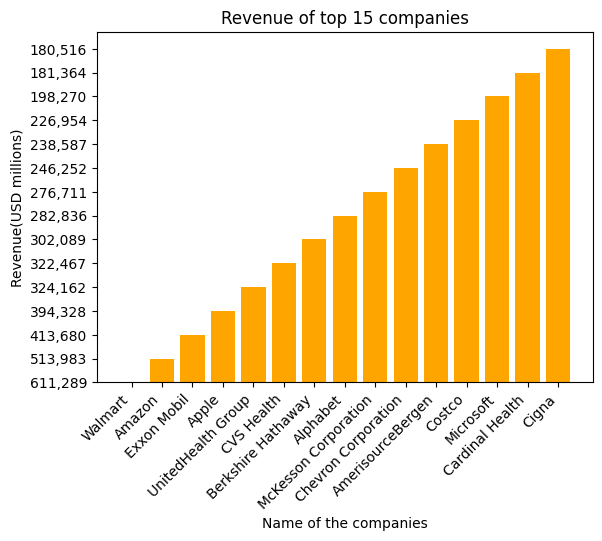

In [ ]:
fig, ax = plt.subplots()
plt.bar(df1['Name'], df1['Revenue (USD millions)'], color = 'orange')
plt.xlabel('Name of the companies')
plt.ylabel('Revenue(USD millions)')
plt.title('Revenue of top 15 companies')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

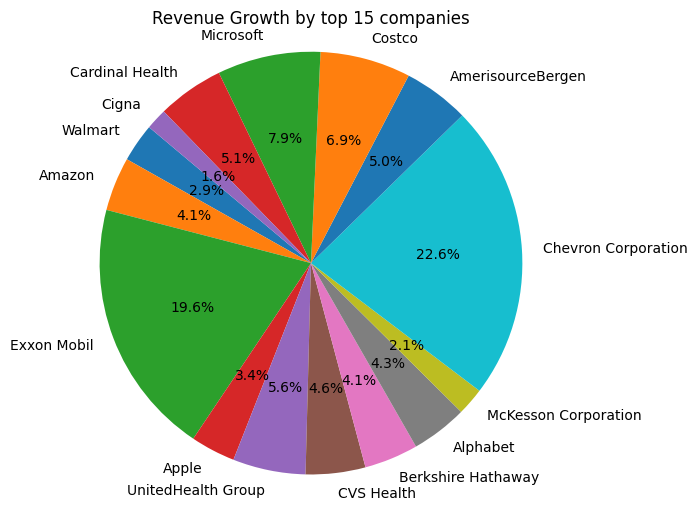

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df1['Revenue growth'].str.split('%').str[0].astype(float), labels = df1['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth by top 15 companies')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
len(df)

100

In [ ]:
df2 = {}

df['Employees'] = df['Employees'].str.replace(',', '').astype(int)
df2 = df.sort_values(by='Employees', ascending= False)



In [ ]:
df2.reset_index()


,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,2100000,"Bentonville, Arkansas"
1,1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,1540000,"Seattle, Washington"
2,51,52,United States Postal Service,Logistics,"78,620",2.0%,576000,"Washington, D.C."
3,40,41,FedEx,Transportation,"93,512",11.4%,518249,"Memphis, Tennessee"
4,19,20,The Home Depot,Retail,"157,403",4.1%,471600,"Atlanta, Georgia"
...,...,...,...,...,...,...,...,...
95,73,74,Enterprise Products,Petroleum industry,"58,186",42.6%,7300,"Houston, Texas"
96,71,72,World Fuel Services,Petroleum industry and Logistics,"59,043",88.4%,5214,"Miami, Florida"
97,75,76,Plains All American Pipeline,Petroleum industry,"57,342",36.3%,4100,"Houston, Texas"
98,93,94,PBF Energy,Petroleum industry,"46,830",71.8%,3616,"Parsippany–Troy Hills, New Jersey"
